# Boosting, Ensembles, and Clusters

![](images/viola-jones.png)

In [29]:
import cv2 as cv

In [30]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
import cv2 as cv

# Read image from your local file system
original_image = cv.imread('images/faces2.jpg')

# Convert color image to grayscale for Viola-Jones
grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

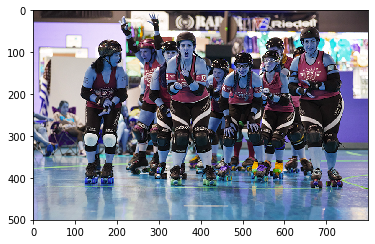

In [32]:
plt.imshow(original_image);

In [33]:
face_cascade = cv.CascadeClassifier('/Users/jacobkoehler/Library/Python/3.7/lib/python/site-packages/cv2/data/haarcascade_frontalface_alt.xml')

In [25]:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

In [34]:
for (column, row, width, height) in detected_faces:
    cv.rectangle(
        original_image,
        (column, row),
        (column + width, row + height),
        (0, 255, 0),
        2
    )

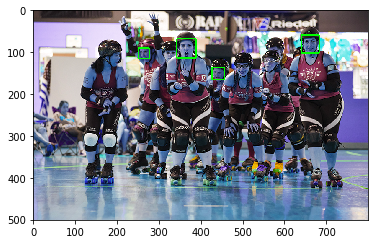

In [35]:
plt.imshow(original_image);

### AdaBoost and XGboost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [82]:
boost = AdaBoostClassifier(n_estimators=1000)

In [83]:
from sklearn.datasets import load_breast_cancer

In [84]:
data = load_breast_cancer()

In [85]:
X, y = data.data, data.target

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [88]:
np.unique(y_test, return_counts=True)[1]

array([52, 91])

In [89]:
84/(84 + 59)

0.5874125874125874

In [90]:
boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000)

In [91]:
boost.score(X_test, y_test)

0.972027972027972

In [92]:
pd.DataFrame({'feature': data.feature_names, 
              'importance': boost.feature_importances_})\
                    .sort_values(by = 'importance', ascending = False).head(5)

,feature,importance
21,worst texture,0.083
19,fractal dimension error,0.078
13,area error,0.078
24,worst smoothness,0.071
7,mean concave points,0.065


In [93]:
import xgboost as xgb

In [94]:
clf = xgb.XGBClassifier()

In [95]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
clf.score(X_test, y_test)

0.9790209790209791

In [97]:
pd.DataFrame({'feature': data.feature_names, 
              'importance': clf.feature_importances_})\
                    .sort_values(by = 'importance', ascending = False).head(5)

,feature,importance
22,worst perimeter,0.396594
20,worst radius,0.271599
27,worst concave points,0.091362
3,mean area,0.024820
10,radius error,0.021911


In [98]:
from sklearn.datasets import make_blobs

In [117]:
X, y = make_blobs(centers = 3)

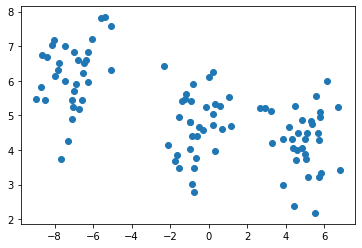

In [118]:
plt.scatter(X[:, 0], X[:, 1])#, c = y)

In [119]:
from sklearn.cluster import KMeans

In [120]:
kmeans = KMeans(n_clusters=3)

In [121]:
kmeans.fit(X, y)

KMeans(n_clusters=3)

In [122]:
labels = kmeans.labels_

In [123]:
labels

array([2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2,
       0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0], dtype=int32)

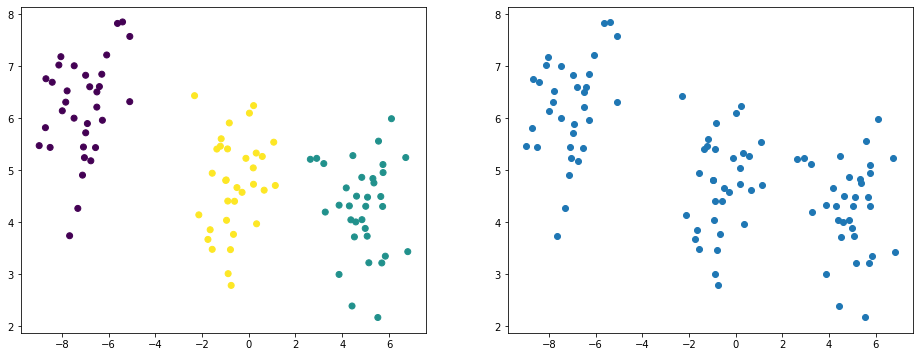

In [126]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
ax[0].scatter(X[:, 0], X[:, 1], c = labels)
ax[1].scatter(X[:, 0], X[:, 1])#, c = y)